In [ ]:
#notebook to test scripts to make plots

In [1]:
#from ML_functions_sources import max_f
from ML_functions import *
#import ML_functions as ml
import numpy as np
import matplotlib.pyplot as plt

done generating events


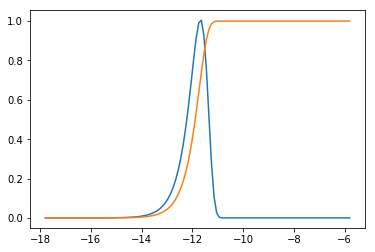

-11.363380935354206

In [2]:
qmd = np.array([0.1,0.1])
max_f(1, 50, qmd, rho_mirrordisk, data = data_masked, logfexp = 0)

In [5]:
import numpy as np
x = np.arange(1)
x[::1]

array([0])

In [9]:
max_f(1, 1, 1.0, rho_NFW, data='LMC', logfexp=0)

done generating events


-3.4501592348981904

In [15]:
from scipy.integrate import tplquad
from astropy import units as u
from density_funcs import *

def totalmass(rho, q):
    integrand = lambda r, z, th, q : rho(r,z,th,q)*r

    Theta = np.linspace(0,2*np.pi, 1000)
    lim = 50000
    Z = np.linspace(-lim, lim, 1000)*u.parsec
    R = np.linspace(0, 2*lim, 1000)*u.parsec
    
    grid = np.meshgrid(R, Z, Theta)
    
    
    
    return grid
    
grid = totalmass(rho_NFW, 1)

In [16]:
Rho = rho_NFW(grid[0], grid[1], grid[2], 1.0)

In [17]:
print(Rho)

[[[2.63287420e-04 2.63287420e-04 2.63287420e-04 ... 2.63287420e-04
   2.63287420e-04 2.63287420e-04]
  [2.63286093e-04 2.63286093e-04 2.63286093e-04 ... 2.63286093e-04
   2.63286093e-04 2.63286093e-04]
  [2.63282111e-04 2.63282111e-04 2.63282111e-04 ... 2.63282111e-04
   2.63282111e-04 2.63282111e-04]
  ...
  [3.15400035e-05 3.15400035e-05 3.15400035e-05 ... 3.15400035e-05
   3.15400035e-05 3.15400035e-05]
  [3.14705764e-05 3.14705764e-05 3.14705764e-05 ... 3.14705764e-05
   3.14705764e-05 3.14705764e-05]
  [3.14013391e-05 3.14013391e-05 3.14013391e-05 ... 3.14013391e-05
   3.14013391e-05 3.14013391e-05]]

 [[2.64617645e-04 2.64617645e-04 2.64617645e-04 ... 2.64617645e-04
   2.64617645e-04 2.64617645e-04]
  [2.64616306e-04 2.64616306e-04 2.64616306e-04 ... 2.64616306e-04
   2.64616306e-04 2.64616306e-04]
  [2.64612290e-04 2.64612290e-04 2.64612290e-04 ... 2.64612290e-04
   2.64612290e-04 2.64612290e-04]
  ...
  [3.15748322e-05 3.15748322e-05 3.15748322e-05 ... 3.15748322e-05
   3.15748

In [3]:
np.arange(0,2*np.pi, np.pi/2)

array([0.        , 1.57079633, 3.14159265, 4.71238898])

TypeError: Invalid dimensions for image data

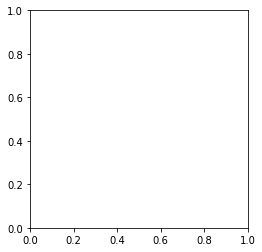

In [5]:
from density_funcs import *

r = np.linspace(-10000, 10000, 100)*u.parsec
z = np.linspace(-10000, 10000, 100)*u.parsec
#th = np.linspace(0,np.pi, 100)

co = np.meshgrid(r,z, th)
rs = rho_semis(co[0],co[1], co[2],1.0)

plt.imshow(rs.value)
plt.colorbar()
plt.show()

#rm = rho_mirrordisktilt(np.abs(co[0]),co[1], [0.0, 0.0])
#plt.imshow(rm.value)
#plt.colorbar()

In [2]:
from astropy.io import fits

hdu = fits.open('galaxy1.fits')
data0 = hdu[1].data
data_masked = data0[~np.less(np.sqrt(data0['glat']**2 + ((data0['glon']+180)%360 - 180)**2), 2.0)]
data_masked5 = data0[~np.less(np.sqrt(data0['glat']**2 + ((data0['glon']+180)%360 - 180)**2), 5.0)]


In [5]:
N_sources = 500000

N_step = N_sources
        #print(data)
print(data0.size, N_step)
res = np.int(data0.size/N_step)
N_ev = 0

sources_per_LoS = 17e9/N_sources

spots = np.linspace(0, data0.size - 1, N_sources)
spots = spots.astype(int)
print(spots)
                 

i = 0
for s in data0[spots]:
    i = i+1
    
    if (i >= N_sources): break
    
print('number of sources: ', i)

31800 500000
[    0     0     0 ... 31798 31798 31799]
number of sources:  500000


In [3]:
from astropy.io import fits
hdu = fits.open('galaxy1.fits')
data = hdu[1].data

In [33]:
import numpy as np

rng = np.random.default_rng()

print(data[0])
rng.shuffle(data[0])
print(data[0])

AttributeError: module 'numpy.random' has no attribute 'default_rng'

In [3]:
from scipy.stats import poisson
import numpy as np
import matplotlib.pyplot as plt

mu = 0.6
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')
print(mean, var, skew, kurt)


0.6 0.6 1.2909944487358056 1.6666666666666667


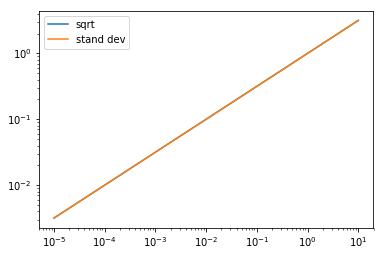

In [7]:
mu = np.logspace(-5,1,20)

sqrt = np.sqrt(mu)
stds = poisson.std(mu)

plt.loglog(mu, sqrt, label = 'sqrt')
plt.loglog(mu, stds, label = 'stand dev')
plt.legend()

plt.show()

In [3]:
from ML_functions import max_f, gen_events
from density_funcs import rho_NFW, rho_mirrordisk

from astropy.io import fits
hdu = fits.open('galaxy1.fits')
data = hdu[1].data

import numpy as np

#print(max_f(0.36, 20, [1.0,1.0], rho_mirrordisk, err_baryons = 0.5, logfexp = 0, baryons = True, iso = False))

#print(max_f(0.36, 20, [1.0,1.0], rho_mirrordisk, err_baryons = 0.005, logfexp = 0, baryons = True, iso = False))

#print(max_f(1.0, 20, 1.0, rho_NFW, err_baryons = 0.05, logfexp = 0, baryons = True, iso = True))
#print(max_f(1.0, 20, 1.0, rho_NFW, err_baryons = 0.005, logfexp = 0, baryons = True, iso = True))

#events, T = gen_events(0.36, 20, 1.0, rho_NFW, data = data, iso = True)

In [ ]:
M = np.logspace(-2, 1, 30)
F = np.zeros_like(M)
F1 = np.zeros_like(M)

i=0
for m in M:
    F[i] = max_f(m, 100, [1.0,1.0], rho_mirrordisk, err_baryons = 0.05, logfexp = 0, m_b = 0.36, baryons = False, iso = False)
    #F1[i] = max_f(m, 20, [1.0,1.0], rho_mirrordisk, err_baryons = 0.05, logfexp = 0, m_b = 1.0, baryons = True, iso = False)
    print(m, F[i])
    i = i+1
np.savetxt('zoom_constraints_baryon_range.txt', F)
#np.savetxt('zoom_constraints_m1.txt', F1)

done generating events
found where to start
0.01 -3.96746826631455
done generating events
found where to start
0.01268961003167922 -3.847246457320231
done generating events
found where to start
0.01610262027560939 -3.722754303174837
done generating events
found where to start
0.020433597178569417 -3.6112186220580536
done generating events
found where to start
0.02592943797404667 -3.50416281079771
done generating events
found where to start
0.03290344562312668 -3.3955514161283307
done generating events
found where to start
0.041753189365604 -3.2881495840480683
done generating events
found where to start
0.05298316906283707 -3.188398656782682
done generating events
found where to start
0.06723357536499334 -3.0995537887074334
done generating events
found where to start
0.08531678524172806 -3.0200570499087402
done generating events
found where to start
0.10826367338740546 -2.9522671901786155
done generating events
found where to start
0.1373823795883263 -2.8693060673346196
done generating 

In [ ]:
import matplotlib.pyplot as plt

plt.plot(M, F, 'r-', label = 'DCO constraints, m_b = 0.36')
plt.plot([0.36, 0.36], [-4.5, -1], 'r--')

plt.plot(M, F1, 'b-', label = 'DCO constraints, m_b = 1.0')
plt.plot([1.0, 1.0], [-4.5, -1], 'b--')

unc = np.log10(0.05)
plt.plot([1e-2, 1e1], [unc, unc], 'k--', label = 'baryon uncertainty')
plt.xscale('log')

plt.xlabel('mass [$M_\odot$]')
plt.ylabel('$\log_{10}(M_{DCO}/M_{star})$')
plt.legend()

plt.savefig('figures/mass_spike.png')
#np.savetxt('spikeplot.txt', F)

In [6]:
events, T = gen_events(0.36, 20, [1.0,1.0], rho_mirrordisk, data = data, iso = False)

In [3]:
from scipy.stats import poisson, norm
import numpy as np
import matplotlib.pyplot as plt

def p_alpha(a):
    return norm.logpdf(a, loc = 1, scale = 0.05)
    
def PDF(f_DM, ab):
    N_B = events[0]#[0,0]
    N_D = events[1]#[0,0]
    #ab = 1 + ab

    sources_per_LoS = 17e9/20
    
    #K = np.arange(0,100)
    k = np.expand_dims(np.expand_dims(np.arange(0,100), 0), 0)

    N_D = np.expand_dims(N_D, 2)
    N_B = np.expand_dims(N_B, 2)
    karray = np.zeros([20,20,100])
    
    #for i in np.arange(100):
        #k = K[:,:,i]
    karray = poisson.pmf(k, N_B)*np.nan_to_num(poisson.logpmf(k, (f_DM*N_D + ab*N_B)))
    Lpois_new = sources_per_LoS*np.sum(karray,2)
    
    #print(np.sum(karray,2))

    sum_log = np.sum(Lpois_new) + p_alpha(ab)
    #sum_log = p_alpha(ab)
    return sum_log
    



In [12]:
f_axis = np.logspace(-6,0, 80)
fstep = np.roll(f_axis, -1) - f_axis
fstep[-1] = 0

a_axis = np.linspace(0.8, 1.2, 80)
astep = np.roll(a_axis, -1) - a_axis
astep[-1] = 0

p = np.zeros([80,80])
i = 0
for f in f_axis:
    j = 0
    for a in a_axis:
        p[i,j] = PDF(f,a) + np.log10(f) #+ np.log10(a)
        #print(f, a, p[i,j])
        j = j+1
    i = i+1


p = np.flip(p, axis = 0)

In [138]:
print(np.sum(events[1], 1), np.sum(events[0], 1))

[5.95702608e-08 4.60099968e-07 4.14790764e-06 5.38728279e-06
 1.26568351e-04 2.12865744e-06 1.26707866e-04 1.42258924e-05
 1.87204737e-05 1.80241044e-05 4.94534050e-05 6.24248880e-06
 2.34965505e-06 2.17782242e-05 3.99728478e-06 1.92847832e-05
 1.43097505e-05 1.13383086e-04 4.12069965e-05 2.43519566e-05] [5.95702608e-08 4.60099968e-07 4.14790764e-06 5.38728279e-06
 1.26568351e-04 2.12865744e-06 1.26707866e-04 1.42258924e-05
 1.87204737e-05 1.80241044e-05 4.94534050e-05 6.24248880e-06
 2.34965505e-06 2.17782242e-05 3.99728478e-06 1.92847832e-05
 1.43097505e-05 1.13383086e-04 4.12069965e-05 2.43519566e-05]


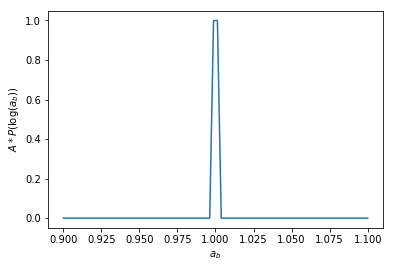

In [7]:
p_nod = np.zeros(80)
A = np.linspace(0.9, 1.1, 80)

i=0
for a in A:
    p_nod[i] = PDF(0, a) #+ np.log10(a)
    i = i+1
    
#print(p_nod)
plt.plot(A, np.exp(p_nod - np.max(p_nod)))
plt.ylabel('$A*P( \log(a_b))$')
plt.xlabel('$a_b$')

#plt.savefig('./figures/alpha_baryon_prob.png')

[-5.92320626 -5.52327035 -5.13358921 -4.75416284 -4.38499123 -4.02607439
 -3.67741232 -3.33900501 -3.01085247 -2.6929547  -2.38531169 -2.08792345
 -1.80078998 -1.52391127 -1.25728734 -1.00091816 -0.75480376 -0.51894412
 -0.29333925 -0.07798915  0.12710619  0.32194676  0.50653256  0.6808636
  0.84493987  0.99876137  1.14232811  1.27564008  1.39869728  1.51149972
  1.61404739  1.70634029  1.78837842  1.86016179  1.92169039  1.97296423
  2.01398329  2.04474759  2.06525713  2.07551189  2.07551189  2.06525713
  2.04474759  2.01398329  1.97296423  1.92169039  1.86016179  1.78837842
  1.70634029  1.61404739  1.51149972  1.39869728  1.27564008  1.14232811
  0.99876137  0.84493987  0.6808636   0.50653256  0.32194676  0.12710619
 -0.07798915 -0.29333925 -0.51894412 -0.75480376 -1.00091816 -1.25728734
 -1.52391127 -1.80078998 -2.08792345 -2.38531169 -2.6929547  -3.01085247
 -3.33900501 -3.67741232 -4.02607439 -4.38499123 -4.75416284 -5.13358921
 -5.52327035 -5.92320626]


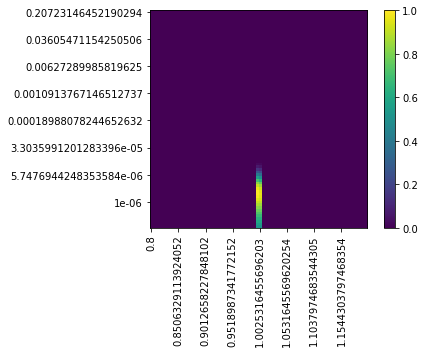

In [14]:
print(p_alpha(a_axis))
plt.imshow(np.exp(p - np.max(p)))

plt.xticks(np.arange(80)[::10], a_axis[::10], rotation = 'vertical')
plt.yticks(np.arange(80)[::10], np.flip(f_axis[::10]))
plt.colorbar()
plt.show()

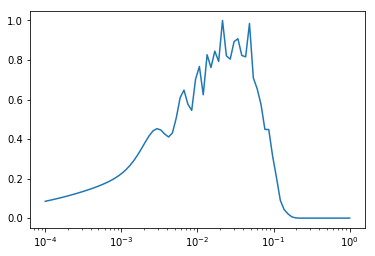

In [197]:
from scipy.special import logsumexp

pcomp = logsumexp(np.flip(p, axis=0), 1)
plt.plot(f_axis, np.exp(pcomp-np.max(pcomp)))
plt.xscale('log')
#plt.yscale('log')

In [6]:
import numpy as np
N_B = events[0]

sources_per_LoS = 17e9/20

total = sources_per_LoS*np.sum(N_B)
total

495946.748300778

[[-0.0000e+000 -0.0000e+000 -0.0000e+000 -0.0000e+000 -0.0000e+000
  -0.0000e+000 -0.0000e+000 -0.0000e+000 -0.0000e+000 -0.0000e+000
  -0.0000e+000 -0.0000e+000 -0.0000e+000 -0.0000e+000 -0.0000e+000
  -0.0000e+000 -0.0000e+000 -0.0000e+000 -0.0000e+000 -0.0000e+000]
 [-0.0000e+000 -0.0000e+000 -0.0000e+000 -0.0000e+000 -0.0000e+000
  -0.0000e+000 -0.0000e+000 -0.0000e+000 -0.0000e+000 -0.0000e+000
  -0.0000e+000 -0.0000e+000 -0.0000e+000 -0.0000e+000 -0.0000e+000
  -0.0000e+000 -0.0000e+000 -0.0000e+000 -0.0000e+000 -0.0000e+000]
 [-0.0000e+000 -0.0000e+000 -0.0000e+000 -0.0000e+000 -0.0000e+000
  -0.0000e+000 -0.0000e+000 -0.0000e+000 -0.0000e+000 -0.0000e+000
  -0.0000e+000 -0.0000e+000 -0.0000e+000 -0.0000e+000 -0.0000e+000
  -0.0000e+000 -0.0000e+000 -0.0000e+000 -0.0000e+000 -0.0000e+000]
 [-0.0000e+000 -0.0000e+000 -0.0000e+000 -0.0000e+000 -0.0000e+000
  -0.0000e+000 -0.0000e+000 -0.0000e+000 -0.0000e+000 -0.0000e+000
  -0.0000e+000 -0.0000e+000 -0.0000e+000 -0.0000e+000 -0.00

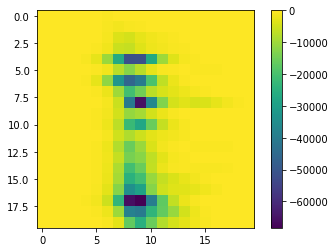

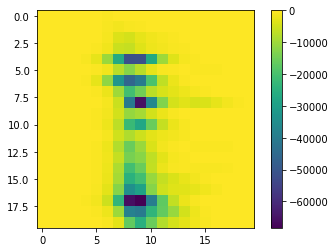

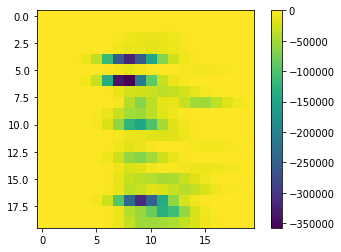

In [31]:
from scipy.stats import poisson
import numpy as np
import matplotlib.pyplot as plt

N_B = events[0]
N_D = events[1]

ab = 1.0
f_DM = 1.0

sources_per_LoS = 17e9/20

Lpois = sources_per_LoS*poisson.logpmf(np.rint(N_B), (f_DM*N_D + ab*N_B))
Lpois_wrong = sources_per_LoS*poisson.logpmf(0, (f_DM*N_D + ab*N_B))

k = np.expand_dims(np.expand_dims(np.arange(0,100), 0), 0)

N_D = np.expand_dims(N_D, 2)
N_B = np.expand_dims(N_B, 2)
karray = poisson.pmf(k, N_B)*poisson.logpmf(k, (f_DM*N_D + ab*N_B))
Lpois_new = sources_per_LoS*np.sum(karray,2)


print(karray[:,:,56])
#NOTE karray goes to zero past 56, so going up to 100 just to be safe seems reasonable. Still pretty quick.

plt.imshow(Lpois)
plt.colorbar()
plt.show()

plt.imshow(Lpois_wrong)
plt.colorbar()
plt.show()

plt.imshow(Lpois_new)
plt.colorbar()
plt.show()

In [43]:
T = np.logspace(-3, 3, 20+1)
step = np.roll(T,-1) - T


step[-1] = 0
T = T[:-1]

print(step, T)

[9.95262315e-04 1.98580939e-03 3.96221064e-03 7.90564958e-03
 1.57738447e-02 3.14729578e-02 6.27968067e-02 1.25296102e-01
 2.49998590e-01 4.98812766e-01 9.95262315e-01 1.98580939e+00
 3.96221064e+00 7.90564958e+00 1.57738447e+01 3.14729578e+01
 6.27968067e+01 1.25296102e+02 2.49998590e+02 4.98812766e+02
 0.00000000e+00] [1.00000000e-03 1.99526231e-03 3.98107171e-03 7.94328235e-03
 1.58489319e-02 3.16227766e-02 6.30957344e-02 1.25892541e-01
 2.51188643e-01 5.01187234e-01 1.00000000e+00 1.99526231e+00
 3.98107171e+00 7.94328235e+00 1.58489319e+01 3.16227766e+01
 6.30957344e+01 1.25892541e+02 2.51188643e+02 5.01187234e+02]


In [1]:
from plotgen_functions import basic_constraints
basic_constraints(n=20)

done generating events
found where to start
0.0001 -6.3581442467501255 4.383850681924299e-07
done generating events
found where to start
0.000379269019073225 -6.610618243847552 2.451216978629787e-07
done generating events
found where to start
0.0014384498882876629 -6.420718612404324 3.7956082995031203e-07
done generating events
found where to start
0.00545559478116852 -6.011929611783745 9.729048944214931e-07
done generating events
found where to start
0.0206913808111479 -5.567378125628551 2.7078329859488923e-06
done generating events
found where to start
0.07847599703514614 -5.091196059971924 8.10595036352127e-06
done generating events
found where to start
0.2976351441631319 -4.5757214608433845 2.6563086661835155e-05
done generating events
found where to start
1.1288378916846884 -3.9987077808033886 0.00010029798756881282
done generating events
found where to start
4.281332398719396 -3.374433660213268 0.0004222467735882364
done generating events
found where to start
16.237767391887242 -

array([4.38385068e-07, 2.45121698e-07, 3.79560830e-07, 9.72904894e-07,
       2.70783299e-06, 8.10595036e-06, 2.65630867e-05, 1.00297988e-04,
       4.22246774e-04, 1.75225931e-03, 3.53553082e-03, 2.97034931e-03,
       2.12972494e-03, 1.50036400e-03, 1.07350456e-03, 7.94588448e-04,
       6.12048454e-04, 5.00068120e-04, 4.25470107e-04, 3.76291066e-04])

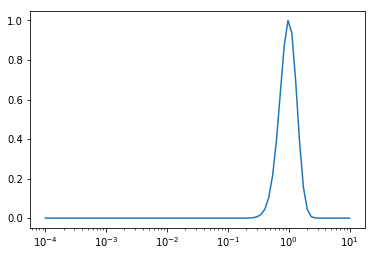

In [111]:
def poimatch(ab, nb=0.00000001):
    
    k = np.arange(0,100)
    karray = 1e9*poisson.pmf(k, nb)*np.nan_to_num(poisson.logpmf(k, ab*nb))
    loglik = np.sum(karray)
    
    karray0 = 1e9*poisson.pmf(k, 0.0)*np.nan_to_num(poisson.logpmf(k, ab*0.0))
    loglik0 = np.sum(karray0)
    
    return loglik + loglik0 #+ norm.logpdf(ab, loc=1, scale=0.05)

AB = np.logspace(-4,1,80)
P = np.zeros(80)
i=0
for ab in AB:
    P[i] = poimatch(ab) #+ np.log(ab)
    i = i+1
    
plt.semilogx(AB,np.exp(P-np.max(P)))

In [115]:
K = np.expand_dims(np.expand_dims(np.arange(0,100), 0), 0)
K[:,:,0]

array([[0]])

In [10]:
import numpy as np

def IMF(m):
    #use a Kroupa IMF
    if (m<0.08):
        alpha = 0.3
    else:
        if (m<0.5):
            alpha = 1.3
        else:
            alpha = 2.3
            
    
    return np.power(m, -1*alpha)

from scipy.integrate import quad

A = quad(IMF, 0, np.inf)[0]

def mIMF(m):
    return IMF(m)*m/A

avm = quad(mIMF, 0, np.inf)[0]

print(avm)

0.9227319413671097


/usr/local/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ML_functions import gen_events
from density_funcs import rho_baryon

from astropy.io import fits
hdu = fits.open('galaxy1.fits')
data = hdu[1].data

events_one, T = gen_events(0.36, 100, 1.0, rho_baryon, data, iso = False, baryons = False)
events_one = events_one[1]

np.savetxt('baryon_events_one.txt', events_one)